In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

%matplotlib inline

In [6]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [11]:
y = df['salario']
X = df.drop(['salario', 'noasiat','postgrad'], axis = 1)  

In [13]:
reg_lin = sm.OLS( y , sm.add_constant(X)).fit()

In [16]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           7.37e-38
Time:                        15:24:45   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

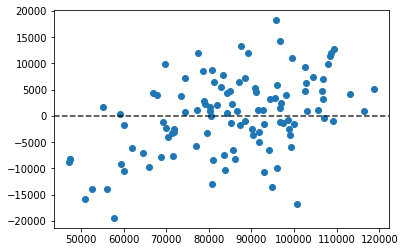

In [19]:
fig, ax = plt.subplots()

y_pred = reg_lin.predict(sm.add_constant(X))

ax.scatter(y, y - y_pred)

plt.axhline(y=0, color = 'black', alpha = 0.8, linestyle = '--')